# Shifting then Tilting HG(0,0)

In [3]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt, cmath as cm
from scipy import integrate
from mpmath import quadgl

In [11]:
#Redefining and naming initial parameters
high_res_plane = pl.Plane(-6e-3,7e-3,1000,-1e-3,1e-3,3) #just used to calculate peak, higher precision
plane = pl.Plane(-2e-3,2e-3,1000,-2e-3,2e-3,1000)
params = pl.Params(wavelength=1.064e-06, w0=1e-3, z0=0)
a = 20e-6 #shift
alpha = 600e-6*0.1 #tilt angle

lam = params.wavelength #wavelength
w0 = params.w0 #spot size



For gap half-width $b$, the right side PD:

\begin{align*}
		C_{nmn'm'}^{R} =&
		\int_{b}^{\infty} dx\int_{-\infty}^{\infty}  dy \;
		\frac{2}{\pi}
		\frac{1}{w_0 w(z)}
        \frac{1}{\sqrt{1 + \big( \frac{z-(x+a)\alpha-z_0}{z_R} \big)^2}}
		\\& \; \times
		\exp \Big(
		\frac
		{
		-ik( (x+a)^{2}+y^{2})
		}
		{2 R_c(z) - (x+a) \alpha }-
		\frac{(x+a) +y^{2}}
		{
		w_0^2
        (1 + \big( \frac{z-(x+a)\alpha -z_0}{z_R} \big)^2)}
		\Big)
		\\& \; \times
		\exp \Big(\frac{ik(x^{2}+y^{2})}{2R_{c}(z)}-
		\frac{x^{2}+y^{2}}{w(z)^{2}} \Big)
\end{align*}

In [11]:
def integ_gaps(alpha_lin,gapsize,z):
    
    sol = [0]*len(alpha_lin)
    
    for i in range (len(alpha_lin)):

        f = lambda y, x: (\frac{2}{\pi}
		1/(w0*pl.w(z))
        1/(np.sqrt((1 + (x+a)*alpha_lin[i])/(params.Zr)^2))
		*
		e**
		((
		-ik( (x+a)**2 + y**2)
        )/
		(2 * pl.radius_curvature(z,params) - (x+a) * alpha )-
		((x+a) +y**2)/
		(
		w_0^2)
        (1 + (z-(x+a)\alpha -z_0))/params.Zr **2)*
		e**(ik(x**2+y**2))/(pl.radius_curvature(z,params))-
		\frac{x**2+y**2}{pl.w(z)**{2}} )    
        
        #with gap 1/1000 plane width
        cr = quadgl(f, [plane.ymin,plane.ymax],[plane.xmax*gapsize,plane.xmax])
        cl = quadgl(f, [plane.ymin,plane.ymax],[plane.xmin,plane.xmin*gapsize])
        
        #args for phi_r and phi_l
        phi_r = cm.phase(cr)
        phi_l = cm.phase(cl)
        
        #result in cycles
        sol[i] = 0.5*(phi_r-phi_l)/(2*np.pi)
        
    return (sol) 

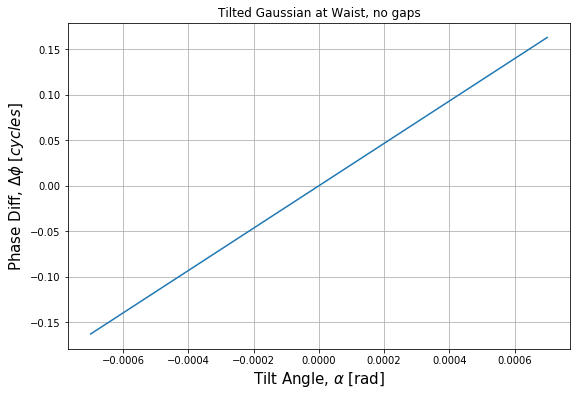

In [14]:
alpha_lin = np.linspace(-700e-6,700e-6,3)

plt.figure(figsize=(9,6))
plt.plot(alpha_lin, integ_tilt_only(alpha_lin,gapsize=0,z=0))

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' +  'cycles]$', fontsize=15) 
plt.title(r'Tilted Gaussian at Waist, no gaps') 

plt.grid()